In [1]:
# IMPORTANDO AS BIBLIOTECAS BÁSICAS
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline

# **MODELO DE PREVISÃO DE CARCINOMA HEPATOCELULAR**

### Carcinoma Hepatocelular é o tipo de câncer mais comum no fígado. Ocorre geralmente em pessoas que possuem problema de cirrose hepática. Seu diagnóstico é geralmente baseado em exames de sangue e imagem. Aos portadores de vírus da hepatite B, o risco de Carcinoma aumenta em aproximadamente 100 vezes.
(msdmanuals.com/pt-br/casa)

## **1 . OBJETIVO GERAL**
### Criar um modelo de Machine Learning que possa prever a probabilidade de letalidade ou sobrevivência do paciente com base em determinados dados pessoais de exames específicos

## **2 . OBJETIVOS ESPECÍFICOS**
### Explorar o conjunto de dados a fim de obter correlações entre características pessoais e letalidade

## **3 . COLETANDO DADOS**

### Dados coletados a partir de arquivo disponibilizado na plataforma do Kaggle

In [4]:
df_1 = pd.read_csv('hcc-data-complete-balanced.csv')
df_1.head()

,Gender,Symptoms,Alcohol,HBsAg,HBeAg,HBcAb,HCVAb,Cirrhosis,Endemic,Smoking,...,ALP,TP,Creatinine,Nodule,Major_Dim,Dir_Bil,Iron,Sat,Ferritin,Class
0,1,0,1,0,0,0,0,1,0,1,...,150,"7,1","0,7",1,"3,5","0,5","52,5",37,856,1
1,0,0,0,0,0,0,1,1,0,1,...,120,7,"0,58",1,"1,8","0,85",32,10,18,1
2,1,0,1,1,0,1,0,1,0,1,...,109,7,"2,1",5,13,"0,1",28,6,16,1
3,1,1,1,0,0,0,0,1,0,1,...,174,"8,1","1,11",2,"15,7","0,2",131,78,1316,0
4,1,1,1,1,0,1,0,1,0,1,...,109,"6,9","1,8",1,9,"0,1",59,15,22,1


## **4 . LIMPANDO OS DADOS**

### O processo de ETL (Extração, Transformação e  'Load' (carregamento dos dados)) é fundamental para que o algoritmo possua um desempenho aceitável.

In [5]:
# QUANTIDADE DE LINHAS E COLUNAS DO CONJUNTO DE DADOS
df_1.shape

(204, 50)

<kbd>Nota-se que há poucos dados no dataset, o que praticamente inviabilizaria a aplicação numa situação real<kbd>

In [6]:
# ELIMINANDO FEATURES COM INFORMAÇÕES PARECIDAS OU AVALIADAS COMO IRRELEVANTES
df_1.drop(['HBsAg','HBeAg','HBcAb','HCVAb','Endemic','Hemochro','HIV','NASH','Varices','Spleno','PHT','PVT',
           'Hallmark','PS','Encephalopathy','Ascites','INR','AFP','AHT','CRI','Ferritin'],axis = 1, inplace = True )


In [7]:
# VERIFICANDO OS TIPOS 
df_1.dtypes

Gender         int64
Symptoms       int64
Alcohol        int64
Cirrhosis      int64
Smoking        int64
Diabetes       int64
Obesity        int64
Metastasis     int64
Age            int64
Grams_day      int64
Packs_year    object
Hemoglobin    object
MCV           object
Leucocytes    object
Platelets     object
Albumin       object
Total_Bil     object
ALT            int64
AST            int64
GGT            int64
ALP            int64
TP            object
Creatinine    object
Nodule         int64
Major_Dim     object
Dir_Bil       object
Iron          object
Sat           object
Class          int64
dtype: object

In [8]:
# TRANSFORMANDO VÍRGULAS EM PONTOS
# O DATASET ESTÁ REPRESENTANDO OS DECIMAIS POR VÍRGULA, O QUE O PYTHON NÃO RECONHECE

df_1['Packs_year'] = df_1['Packs_year'].str.replace(',','.')
df_1['Hemoglobin'] = df_1['Hemoglobin'].str.replace(',','.')
df_1['MCV'] = df_1['MCV'].str.replace(',','.')
df_1['Leucocytes'] = df_1['Leucocytes'].str.replace(',','.')
df_1['Platelets'] = df_1['Platelets'].str.replace(',','.')
df_1['Albumin'] = df_1['Albumin'].str.replace(',','.')
df_1['Total_Bil'] = df_1['Total_Bil'].str.replace(',','.')
df_1['TP'] = df_1['TP'].str.replace(',','.')
df_1['Creatinine'] = df_1['Creatinine'].str.replace(',','.')
df_1['Major_Dim'] = df_1['Major_Dim'].str.replace(',','.')
df_1['Dir_Bil'] = df_1['Dir_Bil'].str.replace(',','.')
df_1['Iron'] = df_1['Iron'].str.replace(',','.')
df_1['Sat'] = df_1['Sat'].str.replace(',','.')

In [9]:
#CONVERTENDO TIPOS
# Por conta das vírgulas,o Python leu alguns atributos como strings. Será necessário transformá-los para tipos numéricos

df_1['Packs_year'] = df_1['Packs_year'].astype('float')
df_1['Hemoglobin'] = df_1['Hemoglobin'].astype('float')
df_1['MCV'] = df_1['MCV'].astype('float')
df_1['Leucocytes'] = df_1['Leucocytes'].astype('float')
df_1['Platelets'] = df_1['Platelets'].astype('float')
df_1['Albumin'] = df_1['Albumin'].astype('float')
df_1['Total_Bil'] = df_1['Total_Bil'].astype('float')
df_1['TP'] = df_1['TP'].astype('float')
df_1['Creatinine'] = df_1['Creatinine'].astype('float')
df_1['Major_Dim'] = df_1['Major_Dim'].astype('float')
df_1['Dir_Bil'] = df_1['Dir_Bil'].astype('float')
df_1['Iron'] = df_1['Iron'].astype('float')
df_1['Sat'] = df_1['Sat'].astype('float')


In [10]:
# VERFIFICANDO DADOS NULOS
df_1.isnull().sum()

Gender        0
Symptoms      0
Alcohol       0
Cirrhosis     0
Smoking       0
Diabetes      0
Obesity       0
Metastasis    0
Age           0
Grams_day     0
Packs_year    0
Hemoglobin    0
MCV           0
Leucocytes    0
Platelets     0
Albumin       0
Total_Bil     0
ALT           0
AST           0
GGT           0
ALP           0
TP            0
Creatinine    0
Nodule        0
Major_Dim     0
Dir_Bil       0
Iron          0
Sat           0
Class         0
dtype: int64

In [11]:
#VERIFICANDO DADOS DUPLICADOS
df_1.duplicated().sum()

0

## **5 . EXPLORANDO DADOS**


### Uma rápida verificação de como os dados estão distribuídos. Principalmente se as classes estão sofrendo algum tipo de desequilíbrio e como se apresentam as correlações de determinadas Features.

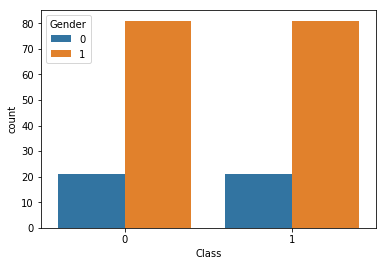

In [12]:
# SOBREVIVÊNCIA AO CÂNCER POR GÊNERO
# Gender: gênero 0 FEMININO / 1 MASCULINO
# Class : saída  0 ÓBITO / 1 SOBREVIVE

sns.countplot(x="Class", hue="Gender", data=df_1)

<kbd>Pela distribuição das labels, parece que o dataset já foi preparado para aplicação de Machine Learning<kbd>

In [13]:
# VISÃO ESTATÍSTICA GERAL
df_1.describe()

,Gender,Symptoms,Alcohol,Cirrhosis,Smoking,Diabetes,Obesity,Metastasis,Age,Grams_day,...,GGT,ALP,TP,Creatinine,Nodule,Major_Dim,Dir_Bil,Iron,Sat,Class
count,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000,...,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000,204.00000
mean,0.794118,0.691176,0.720588,0.897059,0.450980,0.357843,0.107843,0.250000,65.529412,75.294118,...,271.441176,221.176471,9.500490,1.137794,2.735294,6.888235,1.740637,87.455392,39.948333,0.50000
std,0.405340,0.463145,0.449814,0.304630,0.498815,0.480545,0.310945,0.434078,12.778296,63.181354,...,251.681481,168.852570,13.093015,0.950662,1.735894,4.832694,4.005980,55.405441,28.845124,0.50123
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.000000,0.000000,...,23.000000,1.000000,3.900000,0.200000,0.000000,1.500000,0.100000,0.000000,0.000000,0.00000
25%,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,58.750000,19.250000,...,93.500000,109.750000,6.300000,0.717500,1.000000,3.175000,0.360000,46.000000,17.000000,0.00000
50%,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,67.000000,85.000000,...,184.500000,168.000000,7.000000,0.855000,2.000000,5.450000,0.700000,83.000000,30.500000,0.50000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.250000,74.250000,100.000000,...,352.250000,277.250000,7.500000,1.102500,5.000000,9.000000,1.355000,111.250000,65.250000,1.00000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,93.000000,500.000000,...,1575.000000,980.000000,102.000000,7.600000,5.000000,22.000000,29.300000,224.000000,126.000000,1.00000


<kbd>Algumas Features estão apresentando valores mínimos e máximos muito discrepantes, o que  pode ser um problema<kbd>

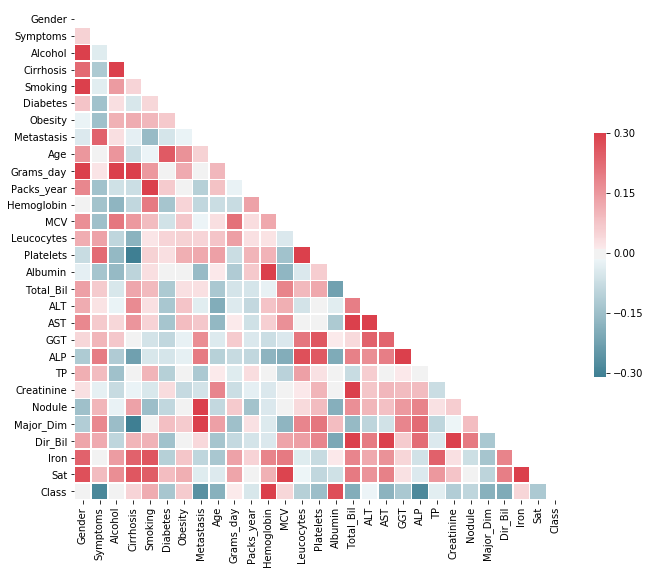

In [14]:
# GRÁFICO DE CORRELAÇÃO

f, ax = plt.subplots(figsize=(11, 9))
corr = df_1.corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap,vmax=.3, center=0,
                 square=True, linewidths=.5, cbar_kws={"shrink": .5})

<kbd>Se muitas variáveis forem altamente correlacionadas o modelo pode ser afetado de alguma maneira<kbd>

### A seguir um pouco de exploração do conjunto de dados.

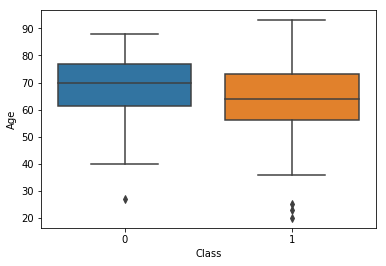

In [15]:
# SOBREVIVÊNCIA POR IDADE
# 0 = ÓBITO  1 = SOBREVIVE

sns.boxplot(x=df_1.Class, y=df_1.Age)

<kbd>A doença se concentra em pessoas com idade a partir dos 55 anos, com mais óbitos aos mais idosos<kbd>

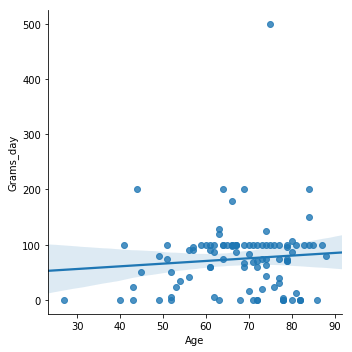

In [16]:
# RELAÇÃO ENTRE IDADE E INGESTÃO DE ÁLCOOL POR DIA(Grams_day) DE PACIENTES QUE VIERAM A ÓBITO

ing_alcool_obitos = df_1[df_1.Class == 0]
sns.lmplot(x="Age", y="Grams_day", data=ing_alcool_obitos, fit_reg=True)

<kbd>Dos casos que vieram a óbito, a ingestão de álcool parece um fator de forte influência<kbd>

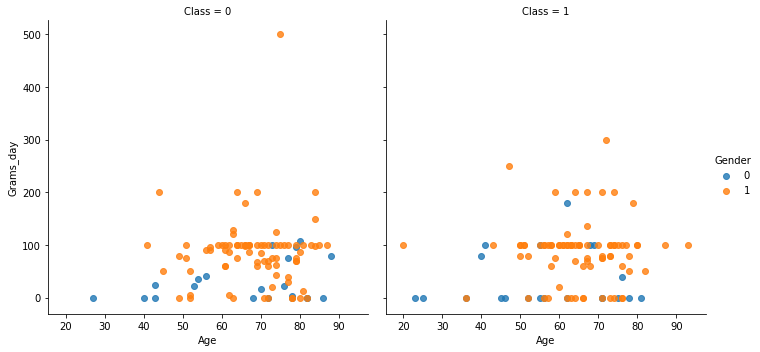

In [17]:
# RELAÇÃO DE IDADE E CONSUMO DIÁRIO DE ÁLCOOL POR GÊNERO, DE SOBREVIVENTES E ÓBITOS

# Gender: gênero 0 FEMININO / 1 MASCULINO
# Class : saída  0 ÓBITO / 1 SOBREVIVE

sns.lmplot(data=df_1, x="Age", y="Grams_day",
           hue='Gender', col="Class", fit_reg=False)

<kbd>A mesma comparação, só que agora expondo também o alto consumo diário de álcool dos que sobreviveram<kbd>

## **6 . PRE-PROCESSAMENTO**

In [18]:
# SEPARAÇÃO EM CONJUNTOS DE TREINO E TESTE

X , y = df_1.iloc[:,:28].values , df_1.iloc[:,28].values

from sklearn.model_selection import train_test_split

X_train , X_test , y_train , y_test = train_test_split (X ,y , test_size = 0.3 , random_state = 42)

In [19]:
X_train.shape

(142, 28)

In [20]:
X_test.shape

(62, 28)

In [21]:
from sklearn.metrics import average_precision_score
from sklearn.metrics import roc_auc_score
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

## **7 . MODELAGEM**

### Comparando o desempenho de 3 modelos diferentes

In [42]:
#SUPPORT VECTOR MACHINE CLASSIFIER

modelo_svc = SVC (probability = True)
modelo_svc.fit(X_train, y_train)

p_svc = modelo_svc.predict_proba (X_test)[:,1]

average_precision_score (y_test , p_svc) , roc_auc_score (y_test , p_svc)

(0.41935483870967744, 0.5)

In [38]:
#LOGISTIC REGRESSION

modelo_lr = LogisticRegression (C = 0.1, solver = 'liblinear' , class_weight = 'balanced')
modelo_lr.fit(X_train, y_train)

p_lr = modelo_lr.predict_proba (X_test)[:,1]

average_precision_score (y_test , p_lr) , roc_auc_score (y_test , p_lr)

(0.7280308472093562, 0.7767094017094017)

In [40]:
#RANDOM FOREST

modelo_rf = RandomForestClassifier ()
modelo_rf.fit(X_train, y_train)

p_rf = modelo_rf.predict_proba (X_test)[:,1]

average_precision_score (y_test , p_rf) , roc_auc_score (y_test , p_rf)

(0.6533892936331961, 0.7868589743589745)

| MODELO | DESEMPENHO APS | DESEMPENHO AUC|
| ------ | ----------- |
| SVC   |0.41935483870967744| 0.5 |
| RLOG | 0.7280308472093562| 0.7767094017094017 |
| RFOREST    | 0.6533892936331961| 0.7868589743589745 |

## **8.MODELAGEM COM OS DADOS PADRONIZADOS**

In [44]:
# PADRONIZAÇÃO
# O STANDARD SCALER PEGA CADA ATRIBUTO, SUBTRAI PELA MÉDIA DA FEATURE E DIVIDE PELO SEU DESVIO PADRÃO
# APROXIMANDO AS MÉDIA A 0 E OS DP A 1

from sklearn.preprocessing import StandardScaler
stdsc = StandardScaler()
X_train_std = stdsc.fit_transform(X_train)
X_test_std = stdsc.fit_transform(X_test)

In [45]:
#SUPPORT VECTOR MACHINE CLASSIFIER COM DADOS PADRONIZADOS

modelo_svc = SVC (probability = True)
modelo_svc.fit(X_train_std, y_train)

p_std_svc = modelo_svc.predict_proba (X_test_std)[:,1]

average_precision_score (y_test , p_std_svc) , roc_auc_score (y_test , p_std_svc)

(0.7573214545662946, 0.7457264957264957)

In [46]:
#LOGISTIC REGRESSION COM DADOS PADRONIZADOS

modelo_lr = LogisticRegression (C = 0.1, solver = 'liblinear' , class_weight = 'balanced')
modelo_lr.fit(X_train_std, y_train)

p_std_lr = modelo_lr.predict_proba (X_test_std)[:,1]

average_precision_score (y_test , p_std_lr) , roc_auc_score (y_test , p_std_lr)

(0.6868588277807947, 0.7243589743589743)

In [47]:
#RANDOM FOREST COM DADOS PADRONIZADOS

modelo_rf = RandomForestClassifier ()
modelo_rf.fit(X_train_std, y_train)

p_std_rf = modelo_rf.predict_proba (X_test_std)[:,1]

average_precision_score (y_test , p_std_rf) , roc_auc_score (y_test , p_std_rf)

(0.7066097188603494, 0.7783119658119659)

| MODELO | DESEMPENHO APS | DESEMPENHO AUC|
| ------ | ----------- |
| SVC   |0.41935483870967744| 0.5 |
| RLOG | 0.7280308472093562| 0.7767094017094017 |
| RFOREST    | 0.6533892936331961| 0.7868589743589745 |
| SVC_PADRON   |0.7573214545662946| 0.7457264957264957 |
| RLOG_PADRON | 0.6868588277807947| 0.7243589743589743 |
| RFOREST_PADRON    | 0.7066097188603494| 0.7783119658119659 |

## **9.MODELAGEM COM ENSEMBLE**

In [49]:
#ENSEMLE COM DADOS ORIGINAIS

from sklearn.ensemble import VotingClassifier

modelo_vot = VotingClassifier( estimators = [('lr',modelo_lr) , ('rf',modelo_rf) , ('svc', modelo_svc)] , voting = 'soft')
modelo_vot.fit(X_train , y_train)

p_modelo_vot = modelo_vot.predict_proba (X_test)[:,1]

average_precision_score (y_test , p_modelo_vot) , roc_auc_score (y_test , p_modelo_vot)

(0.7976654969434712, 0.8044871794871795)

In [50]:
#ENSEMBLE COM DADOS PADRONIZADOS

modelo_vot.fit(X_train_std , y_train)

p_std_modelo_vot = modelo_vot.predict_proba (X_test_std)[:,1]

average_precision_score (y_test , p_std_modelo_vot) , roc_auc_score (y_test , p_std_modelo_vot)

(0.7713415868898548, 0.7638888888888888)

| MODELO | DESEMPENHO APS | DESEMPENHO AUC|
| ------ | ----------- |
| SVC   |0.41935483870967744| 0.5 |
| RLOG | 0.7280308472093562| 0.7767094017094017 |
| RFOREST    | 0.6533892936331961| 0.7868589743589745 |
| SVC_PADRON   |0.7573214545662946| 0.7457264957264957 |
| RLOG_PADRON | 0.6868588277807947| 0.7243589743589743 |
| RFOREST_PADRON    | 0.7066097188603494| 0.7783119658119659 |
| VOTING_ORIG | 0.7976654969434712| 0.8044871794871795 |
| VOTING_PADRON   | 0.7713415868898548| 0.7638888888888888 |


### O melhor desempenho no Average Precision Score (precision + recall) e no Roc AUC Score (média de exemplos aleatórios) se deu com a aplicação de um modelo de ENSEMBLE. Lembrando que o método do ENSEMBLE reúne as previsões de todos os modelos aplicados anteriormente (Suport Vector Machine, Logistic Regression e Random Forest) escolhendo as suas previsões por maioria de votos.